# Things I would like to include

-  More LWP data if possible
-  Maybe some satellite data integration?
-  EOF/SVD analysis of SST vs. LWP
-  JPDF, etc. (poss. contour plot??? May need sat data for this), of SST, AOD/smoke, And LWP.
-  EOF/SVD analysis of LWP vs. AOD/smoke loading?

In [41]:
import matplotlib as mpl
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math, Latex
from numpy.random import rand
from pylab import rcParams, pcolor, show,colorbar, xticks, yticks, title, figure
from IPython.display import Image    
#from mpl_toolkits.basemap import Basemap

In [42]:
# Define a figure: scatterplot. 

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
rcParams['figure.figsize'] = (11, 6.5)

def fig1():
    fig,ax=plt.subplots(1,1)
    ax.plot(sst+273.15,lwp,'o')
    ax.set_xlabel('SST [K]');ax.set_ylabel('LWP [kg/m^2]')
    

In [43]:
# Import some data:
# Select a file to uploadquoting = csv.QUOTE_NONE

file = 'ORACLES_LWP_Tables.csv'
data = np.genfromtxt(file,delimiter=',',dtype=None,encoding=None,names=True)     
#data.dtype



In [44]:
datecode = data['¥éËdate']
stlat = data['start_lat']
stlon = data['start_lon']
endlat = data['end_lat']
endlon = data['end_lon']
lwp = data['LWP_CAS']
sst = data['SST_1pix']
alt = data['end_altitude']
acaod = data['ACAOD']

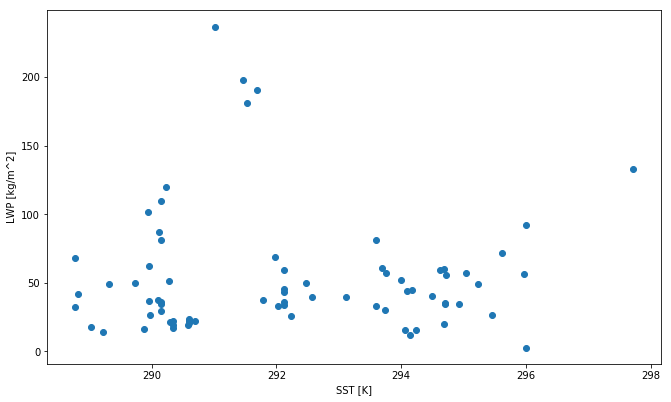

In [45]:
fig1()


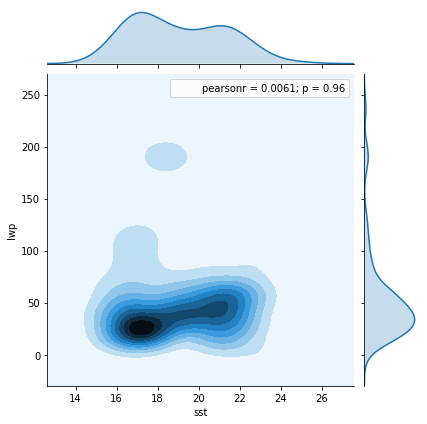

In [46]:
import seaborn as sns
#df = sns.load_dataset("data")

dat = [sst,lwp]
dat = np.transpose(dat)
np.shape(dat)

# both df1 and df2 have bivaraite normals, df1.size=200, df2.size=100
df = pd.DataFrame(dat, columns=['sst', 'lwp'])

# plot
# ========================================   
graph = sns.jointplot(x=df.sst, y=df.lwp, kind="kde")


In [47]:
# Ok, let's see if we can visualize even more at once...  Let's plot LWP ANNNND SST on a lat/lon map, with LWP as a function of
# marker size, and SST as a function of marker color.

# Then we should probably do that box-ey plot...  Yeah.  Take another look at that and try to recreate it...


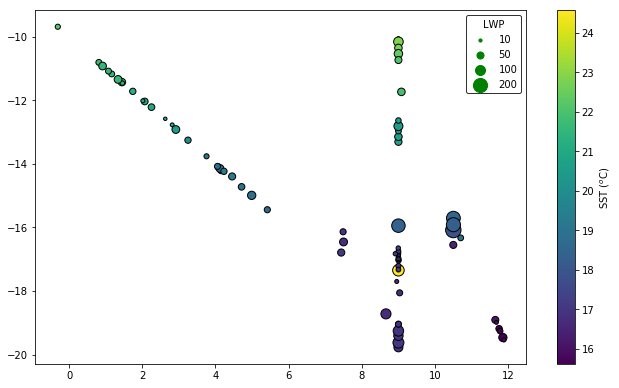

In [48]:
fig2 = plt.scatter(stlon, stlat, lwp, sst,edgecolor='k')
    
# Set up a colorbar for marker color, i.e. SST values.
labels = [np.average(lwp),np.max(lwp),np.min(lwp)]
cbar = plt.colorbar()
cbar.set_label("SST ($^o$C)")


# Set up a legend for marker size, i.e. LWP values.  Unfortunately must do this by plotting some "invisible"
# markers that are within the size range of the LWP values
l1 = plt.scatter([],[], s=10, edgecolors='none')
l2 = plt.scatter([],[], s=50, edgecolors='none')
l3 = plt.scatter([],[], s=100, edgecolors='none')
l4 = plt.scatter([],[], s=200, edgecolors='none')

labels = ['10','50','100','200']
plt.legend([l1,l2,l3,l4],labels,edgecolor='k',title='LWP')

# Inconveniently call all of these commands to change the legend so it's all just grey and doesn't confuse people with random colors
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('green')
leg.legendHandles[3].set_color('green')

# Show the finished product
plt.show()

Text(0,0.5,'LWP [kg/m^2]')

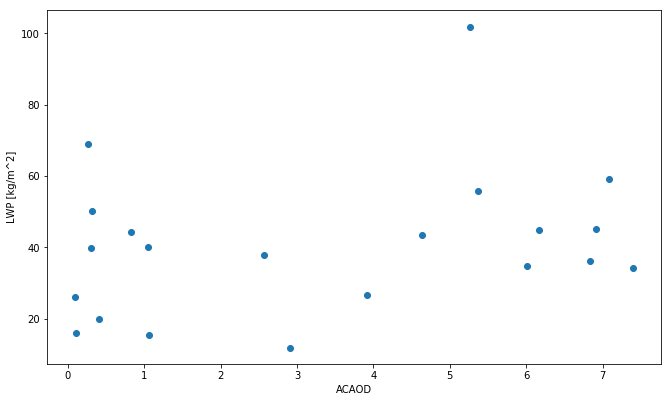

In [52]:
ACAOD = acaod[~np.isnan(acaod)]
LWP = lwp[~np.isnan(acaod)]
SST = sst[~np.isnan(acaod)]

LWP = LWP[ACAOD<=8]
SST = SST[ACAOD<=8]
ACAOD = ACAOD[ACAOD<=8]


fig,ax=plt.subplots(1,1)
ax.plot(ACAOD,LWP,'o')
ax.set_xlabel('ACAOD');ax.set_ylabel('LWP [kg/m^2]')
#ax.set_xlim([0,8])


In [92]:
cov_la = (np.sum((LWP-np.mean(LWP))*(ACAOD-np.mean(ACAOD))))/(len(LWP)-1)
cov_la

16.189234714285718

In [93]:
cor_la = cov_la/(np.std(LWP)*np.std(ACAOD))
cor_la

0.2994693637270287

In [96]:
cov_sl = (np.sum((lwp-np.mean(lwp))*(sst-np.mean(sst))))/(len(lwp)-1)
cov_sl

0.6002546803652998

In [97]:
cor_sl = cov_sl/(np.std(lwp)*np.std(sst))
cor_sl

0.0061419960005363325

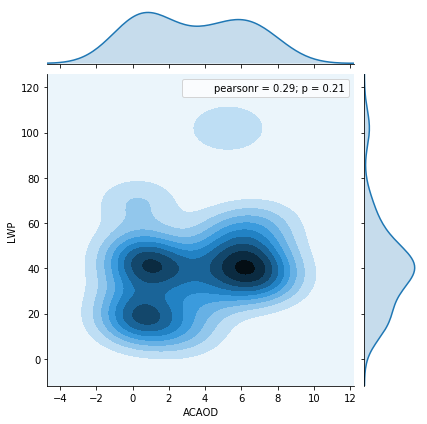

In [88]:
dat1 = [ACAOD,LWP]
dat1 = np.transpose(dat1)
np.shape(dat1)

# both df1 and df2 have bivaraite normals, df1.size=200, df2.size=100
df1 = pd.DataFrame(dat1, columns=['ACAOD', 'LWP'])

# plot
# ========================================   
graph = sns.jointplot(x=df1.ACAOD, y=df1.LWP, kind="kde")

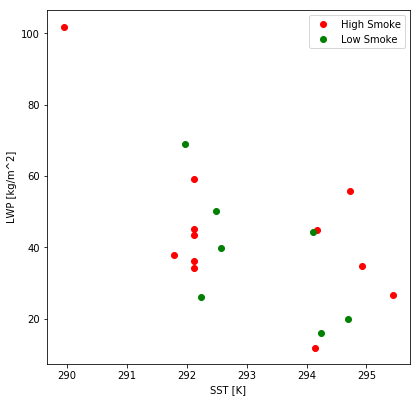

In [89]:
aodhi = ACAOD[ACAOD>2]
aodlo = ACAOD[ACAOD<1]
lwphi = LWP[ACAOD>2]
lwplo = LWP[ACAOD<1]
ssthi = SST[ACAOD>2]
sstlo = SST[ACAOD<1]


# Define a figure: scatterplot. 

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
rcParams['figure.figsize'] = (6.5, 6.5)

def fig10():
    fig,ax=plt.subplots(1,1)
    ax.plot(ssthi+273.15,lwphi,marker='o',c='red',linestyle='none')
    ax.plot(sstlo+273.15,lwplo,marker='o',c='green',linestyle='none')
    ax.set_xlabel('SST [K]');ax.set_ylabel('LWP [kg/m^2]')
    ax.legend(['High Smoke','Low Smoke'])
    
fig10()
#plt.scatter(ssthi+273.15,lwphi,50,'red')
#plt.scatter(sstlo+273.15,lwplo,50,'blue')
#plt.xlabel('SST [K]');plt.ylabel('LWP [kg/m^2]')
#plt.legend(['AOD > 2','AOD < 1'])
#plt.rcParams["figure.figsize"] = [9,9]

In [18]:
###  Separate into separate days and plot above overlaid with ACAOD (only using NW/SE flights and ignoring N/S flights)

##  Start with September 10th flight

index = np.where(datecode==20160910)

sep10_lwp = lwp[index]
sep10_sst = sst[index]
sep10_lat = stlat[index]
sep10_lon = stlon[index]

# load AOD data

file = '20160910_4STAR_AOD.csv'
data = np.genfromtxt(file,delimiter=',',dtype=None,encoding=None,names=True)     

aod530 = data['AOD0530']
aodlat = data['Latitude']
aodlon = data['Longitude']
aodalt = data['GPS_Alt']

# Remove NaN values
aod5301 = aod530[aod530!=-9999]
aodlat1 = aodlat[aod530!=-9999]
aodlon1 = aodlon[aod530!=-9999]
aodalt1 = aodalt[aod530!=-9999]

# Remove data points from below a certain altitude
h=1
aod530 = aod5301[aodalt1 >= h]
aodlat = aodlat1[aodalt1 >= h]
aodlon = aodlon1[aodalt1 >= h]
aodalt = aodalt1[aodalt1 >= h]


In [19]:
# prep for plotting markers based on aod (greater than 2 is high, less than 1 is low)

aod530hi = aod530[aod530 >= 2]
aod530lo = aod530[aod530 <= 1]
aod530mid = aod530[(aod530 > 1) & (aod530 < 2)]

aodlonhi = aodlon[aod530 >= 2]
aodlonlo = aodlon[aod530 <= 1]
aodlonmid = aodlon[(aod530 > 1) & (aod530 < 2)]

aodlathi = aodlat[aod530 >= 2]
aodlatlo = aodlat[aod530 <= 1]
aodlatmid = aodlat[(aod530 > 1) & (aod530 < 2)]

aodalthi = aodalt[aod530 >= 2]
aodaltlo = aodalt[aod530 <= 1]
aodaltmid = aodalt[(aod530 > 1) & (aod530 < 2)]
